<table>
<tr>                                                                                   
     <th>
         <div style='padding:15px;color:#030aa7;font-size:240%;text-align: center;font-style: italic;font-weight: bold;font-family: Georgia, serif'><a href="https://www.kaggle.com/datasets/adityakadam1/footwear">Reconnaissance des Chaussures</a></div>
     </th>
     <th><img src="https://raw.githubusercontent.com/rbizoi/DeepLearning/refs/heads/main/images/chaussures.png" width="96"></th>
 </tr>
</table>



**Reconnaissance des Chaussures**<br>
Le jeu de données contient **3 000** images de fleurs étiquetées en **3** classes.

<table>
    <tr>                                                                                   
         <th  style="text-align:left;background-color:#053061;color:white;">Valeur</th>
         <th  style="text-align:left;background-color:#053061;color:white;">Nom classe</th>
     </tr>
    <tr>
        <th  style="text-align:left">0</th>
        <th  style="text-align:left">Botte</th>
    </tr>
    <tr>
        <th  style="text-align:left">1</th>
        <th  style="text-align:left">Sandale</th>
    </tr>
    <tr>
        <th  style="text-align:left">2</th>
        <th  style="text-align:left">Chaussure</th>
    </tr>
</table>


# <b><div style='padding:18px;background-color:#d8dcd6;color:#030aa7;font-size:130%; border-radius:12px 12px; box-shadow: 8px 8px 8px #042b4c;text-align: left'>Introduction</div></b>

In [1]:
import os
# import json
# @param ["tensorflow", "jax", "torch"]
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
os.environ['KERAS_BACKEND'] = 'tensorflow'  
os.environ['TF_XLA_FLAGS'] = '--tf_xla_enable_xla_devices'
# os.environ['TF_XLA_FLAGS']='--tf_xla_auto_jit=1,--tf_xla_always_defer_compilation=true'
# os.environ['XLA_FLAGS']='--xla_backend_optimization_level=0,--xla_gpu_autotune_level=4,--xla_gpu_disable_ptxas_optimizations=true,--xla_gpu_use_cudnn_batchnorm_level=2'
# os.environ['TF_GPU_ALLOCATOR']='cuda_malloc_async'
os.environ['TF_CPP_MIN_LOG_LEVEL']='5'

In [2]:
! nvidia-smi

Thu Jul  3 15:22:37 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.230.02             Driver Version: 535.230.02   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 3090        Off | 00000000:01:00.0  On |                  N/A |
| 30%   57C    P5              47W / 350W |   1113MiB / 24576MiB |     49%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

## <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:100%; border-radius:10px 10px; box-shadow: 8px 8px 8px #042b4c;text-align: left'>Import libriries </div></b>

In [3]:
import numpy as np, pandas as pd, seaborn as sns, warnings, os, sys, pickle
from matplotlib import pyplot as plt
from datetime import datetime as dt

import matplotlib.font_manager as fm
from matplotlib.lines import Line2D

warnings.filterwarnings(action="ignore")

if int(str(sns.__version__).split('.')[1]) > 8 : 
    plt.style.use('seaborn-v0_8-darkgrid')
else:
    plt.style.use('seaborn-darkgrid')
    
sns.set(font_scale=2)

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

tf.get_logger().setLevel('ERROR')# Suppress TensorFlow logging (2)

In [5]:
print("Tensorflow\t : %s\tCUDA %s\tGPU %s\tXLA %s\nKeras\t\t : %s\nPandas\t\t : %s\nNumPy\t\t : %s"%
      (tf.__version__, 
       tf.test.is_built_with_cuda(), 
       tf.test.is_built_with_gpu_support(), 
       tf.test.is_built_with_xla(), 
       tf.keras.__version__, 
       pd.__version__, 
       np.__version__))

Tensorflow	 : 2.17.0	CUDA True	GPU True	XLA True
Keras		 : 3.6.0
Pandas		 : 2.2.2
NumPy		 : 1.26.4


## <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:100%; border-radius:10px 10px; box-shadow: 8px 8px 8px #042b4c;text-align: left'>Initialisation les GPUs presents </div></b>

In [ ]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')

if len(physical_devices) >  0 :
    for i, gpu in enumerate(physical_devices):
        tf.config.experimental.set_memory_growth(physical_devices[i], True)

    strategy = tf.distribute.experimental.CentralStorageStrategy()
    print('Le système est initialisé avec {0:d} GPUs'.format(strategy.num_replicas_in_sync))

## <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:100%; border-radius:10px 10px; box-shadow: 8px 8px 8px #042b4c;text-align: left'>Outils du document </div></b>

In [7]:
palette = [
            "#030aa7", "#e50000", "#d8863b", "#005f6a", "#6b7c85", "#751973", "#d1e5f0", "#fddbc7",
            "#ffffcb", "#12e193", "#d8dcd6", "#ffdaf0", "#dfc5fe", "#f5054f", "#a0450e",
            "#0339f8", "#f4320c", "#fec615", "#017a79", "#85a3b2", "#fe2f4a", "#a00498", "#b04e0f",
            "#0165fc", "#ff724c", "#fddc5c", "#11875d", "#89a0b0", "#fe828c", "#cb00f5", "#b75203",
            "#0485d1", "#ff7855", "#fbeeac", "#0cb577", "#95a3a6", "#ffb7ce", "#c071fe", "#ca6b02",
            "#92c5de", "#f4a582", "#fef69e", "#18d17b", "#c5c9c7", "#ffcfdc", "#caa0ff", "#cb7723",
            "#d1e5f0", "#fddbc7", "#ffffcb", "#12e193", "#d8dcd6", "#ffdaf0", "#dfc5fe", "#d8863b",
            "#030764", "#be0119", "#dbb40c", "#005249", "#3c4142", "#cb0162", "#5d1451", "#653700",
            "#040348", "#67001f", "#b27a01", "#002d04", "#000000", "#a0025c", "#490648", "#3c0008"
          ]
# sns.palplot(sns.color_palette(palette))

In [8]:
nom_projet                = "01-La preparation des données-Reconnaissance des chaussures"
repertoireProjet          = os.getcwd()
repertoireEnregistrement  = repertoireProjet +'/'+nom_projet+ '/repertoire.images'
repertoireSauvegardes     = repertoireProjet +'/'+nom_projet+ '/repertoire.sauvegardes'

def controleExistenceRepertoire(directory, create_if_needed=True):
    """Voir si le répertoire existe. S'il n'existe pas il est créé."""
    path_exists = os.path.exists(directory)
    if path_exists:
        if not os.path.isdir(directory):
            raise Exception("Trouvé le nom "+directory+" mais c'est un fichier, pas un répertoire")
            return False
        return True
    if create_if_needed:
        os.makedirs(directory)
        
controleExistenceRepertoire(repertoireEnregistrement)
controleExistenceRepertoire(repertoireSauvegardes)

def sauvegarderImage( fichier):
    """Enregistrez la figure. Appelez la méthode juste avant plt.show ()."""
    plt.savefig(os.path.join(repertoireEnregistrement,
                             fichier+f"--{dt.now().strftime('%Y_%m_%d_%H.%M.%S')}.png"), 
                             dpi=600, 
                             bbox_inches='tight')


    
def sauvegarderModelPoids(model, fichierPoids, repertoireSauvegardes=repertoireSauvegardes):
    """Enregistrez les poids du modèle Keras."""
    if fichierPoids != None:
        controleExistenceRepertoire(repertoireSauvegardes)
        nomFichier = os.path.join(repertoireSauvegardes, '{}.keras'.format(fichierPoids))
        model.save_weights(nomFichier)

def sauvegarderModel(model, fichier, repertoireSauvegardes=repertoireSauvegardes):
    """Enregistrez le modèle Keras."""
    if fichier != None:
        controleExistenceRepertoire(repertoireSauvegardes)
        nomFichier = os.path.join(repertoireSauvegardes, '{}.keras'.format(fichier))
        model.save(nomFichier)

def lectureModelPoids(model, fichier, repertoireSauvegardes=repertoireSauvegardes):
    """Si le fichier existe, il est chargé et retourne True, sinon retourne False."""
    nomFichier = os.path.join(repertoireSauvegardes, '{}.keras'.format(fichier))
    if os.path.exists(nomFichier):
        if os.path.isfile(nomFichier):
            model.load_weights(nomFichier)
            return True
    return False

def lectureModel(self, model_filename):
    """Si le fichier existe, il est chargé et retourne True, sinon retourne False."""
    fullpath = self.saved_models_dir+'/'+model_filename+'.keras'
    if os.path.exists(fullpath):
        if os.path.isfile(fullpath):
            model = load_model(fullpath)
            return model
    return None    

def sauvegardeHistorique(model,
                         repertoireSauvegardes,
                         nomSauvegarde='one_hidden_layer_history_batch_size_1'):

    history = pd.DataFrame( model.history)
    history.reset_index(inplace=True)
    history.rename(columns={'index':'epoch'},inplace=True)
    history.to_parquet(os.path.join(repertoireSauvegardes,f'{nomSauvegarde}.gzip'),compression='gzip', engine='pyarrow') 
    return history

def afficheHistoriqueEntrainement(history, palette):
    fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(48,16));
    markersize = 8
    linewidth=2
    
    graph = sns.lineplot(x='epoch', 
                         y='accuracy',  
                         data=history,
                         ax=ax[0],      
                         label='accuracy',
                         err_style=None, 
                         marker='o',
                         markersize=markersize,
                         linewidth=linewidth,
                         color=palette[0],
                         );
    graph = sns.lineplot(x='epoch', 
                         y='val_accuracy',  
                         data=history,
                         ax=ax[0],      
                         label='val_accuracy',
                         err_style=None, 
                         marker='o',
                         markersize=markersize,
                         linewidth=linewidth,
                         color=palette[1],
                         );
    
    graph = sns.lineplot(x='epoch', 
                         y='loss',  
                         data=history,
                         ax=ax[1],      
                         label='loss',
                         err_style=None, 
                         marker='o',
                         markersize=markersize,
                         linewidth=linewidth,
                         color=palette[0],
                         );
    graph = sns.lineplot(x='epoch', 
                         y='val_loss',  
                         data=history,
                         ax=ax[1],      
                         label='val_loss',
                         err_style=None, 
                         marker='o',
                         markersize=markersize,
                         linewidth=linewidth,
                         color=palette[1],
                         );
    sauvegarderImage('afficheHistoriqueEntrainement')
    

# <b><div style='padding:18px;background-color:#d8dcd6;color:#030aa7;font-size:130%; border-radius:12px 12px; box-shadow: 8px 8px 8px #042b4c;text-align: left'>Lecture des données à partir du disque</div></b>

In [9]:
!ls "../donnees/Footwear-Shoe vs Sandal vs Boot Image/archive/Footwear"

Botte  Chaussure  Sandale


In [10]:
dictLabels = {
                0   : 'Botte',
                1   : 'Sandale',
                2   : 'Chaussure'
       }

In [11]:
image_size=(64,64,3)
batch_size=64

In [12]:
repertoire = "../donnees/Footwear-Shoe vs Sandal vs Boot Image/archive/Footwear"

donnees = tf.keras.utils.image_dataset_from_directory(
    directory=repertoire,
    labels='inferred',
    label_mode='categorical',
    batch_size=batch_size,
    image_size=image_size[:2],
    seed=123456789,
    subset="training",
    validation_split=0.1,
)

validation = tf.keras.utils.image_dataset_from_directory(
    directory=repertoire,
    labels='inferred',
    label_mode='categorical',
    batch_size=batch_size,
    image_size=image_size[:2],
    seed=123456789,
    subset="validation",
    validation_split=0.1,
)

Found 3000 files belonging to 3 classes.
Using 2700 files for training.
Found 3000 files belonging to 3 classes.
Using 300 files for validation.


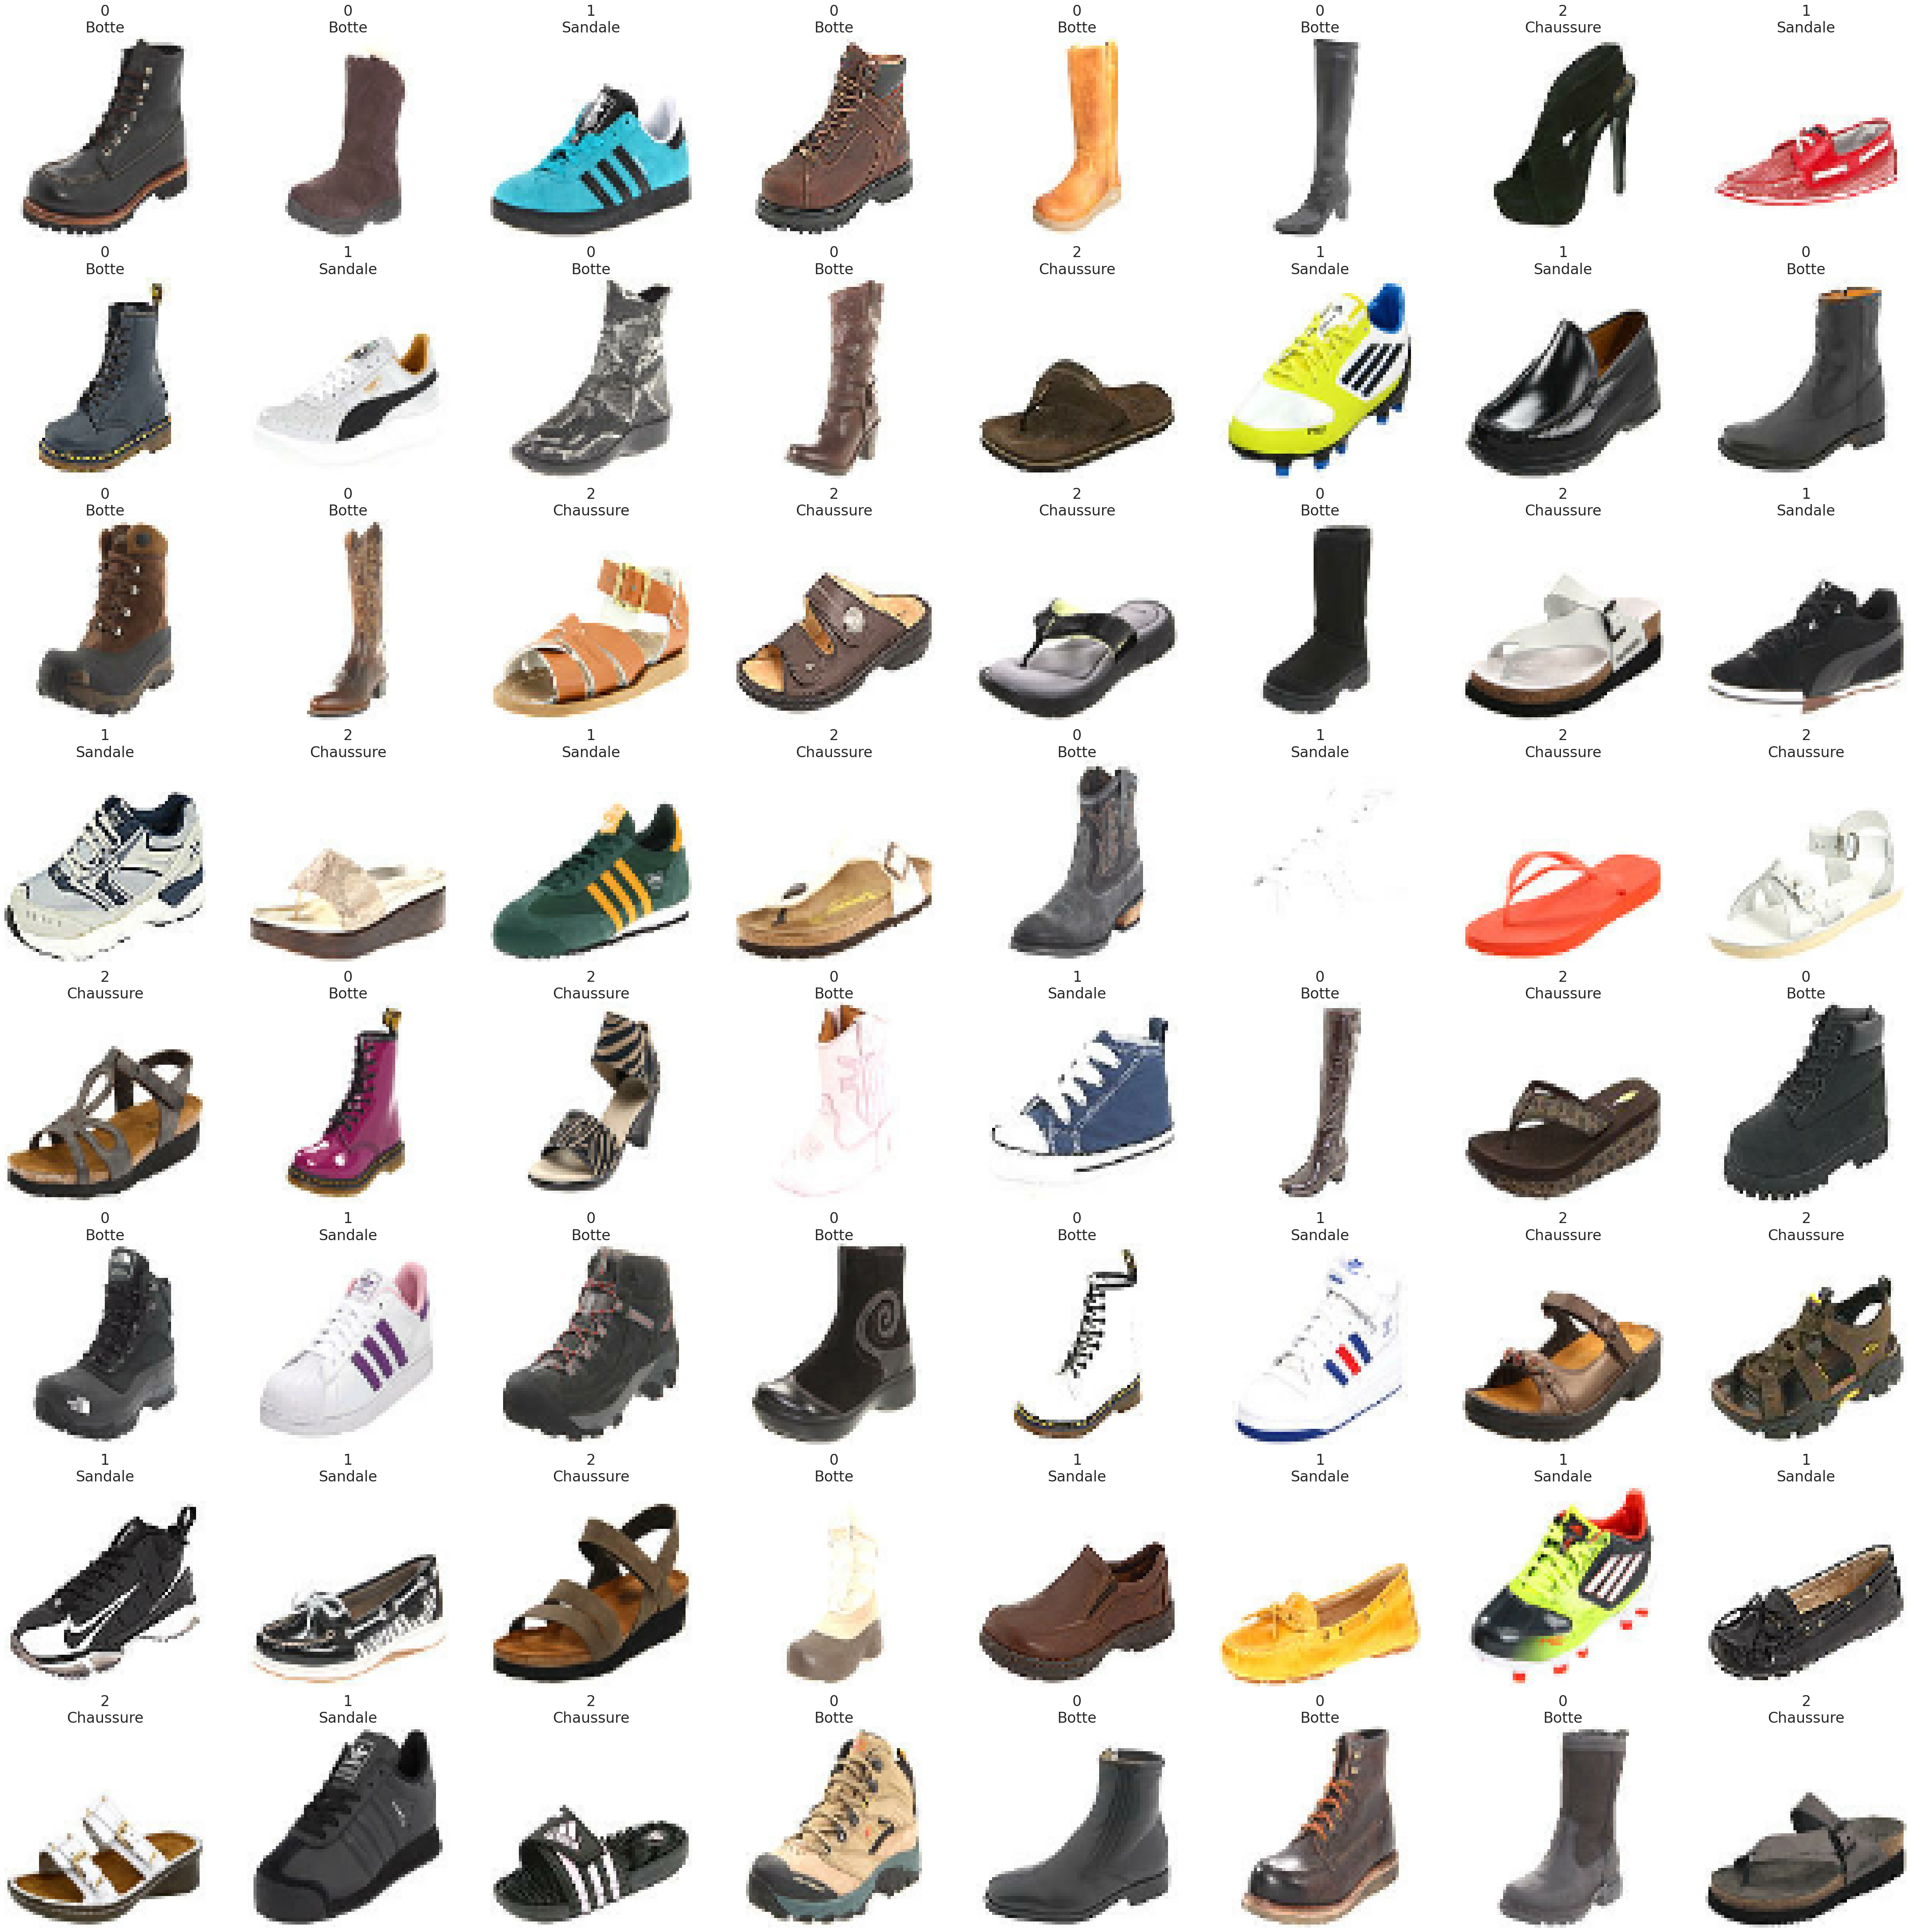

In [13]:
plt.figure(figsize=(56, 56))
for images, labels in donnees.take(2):
    for i in range(64):
        ax = plt.subplot(8, 8, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        label = np.argmax(labels[i])
        plt.title(f'{label}\n{dictLabels[label]}')
        plt.axis("off")

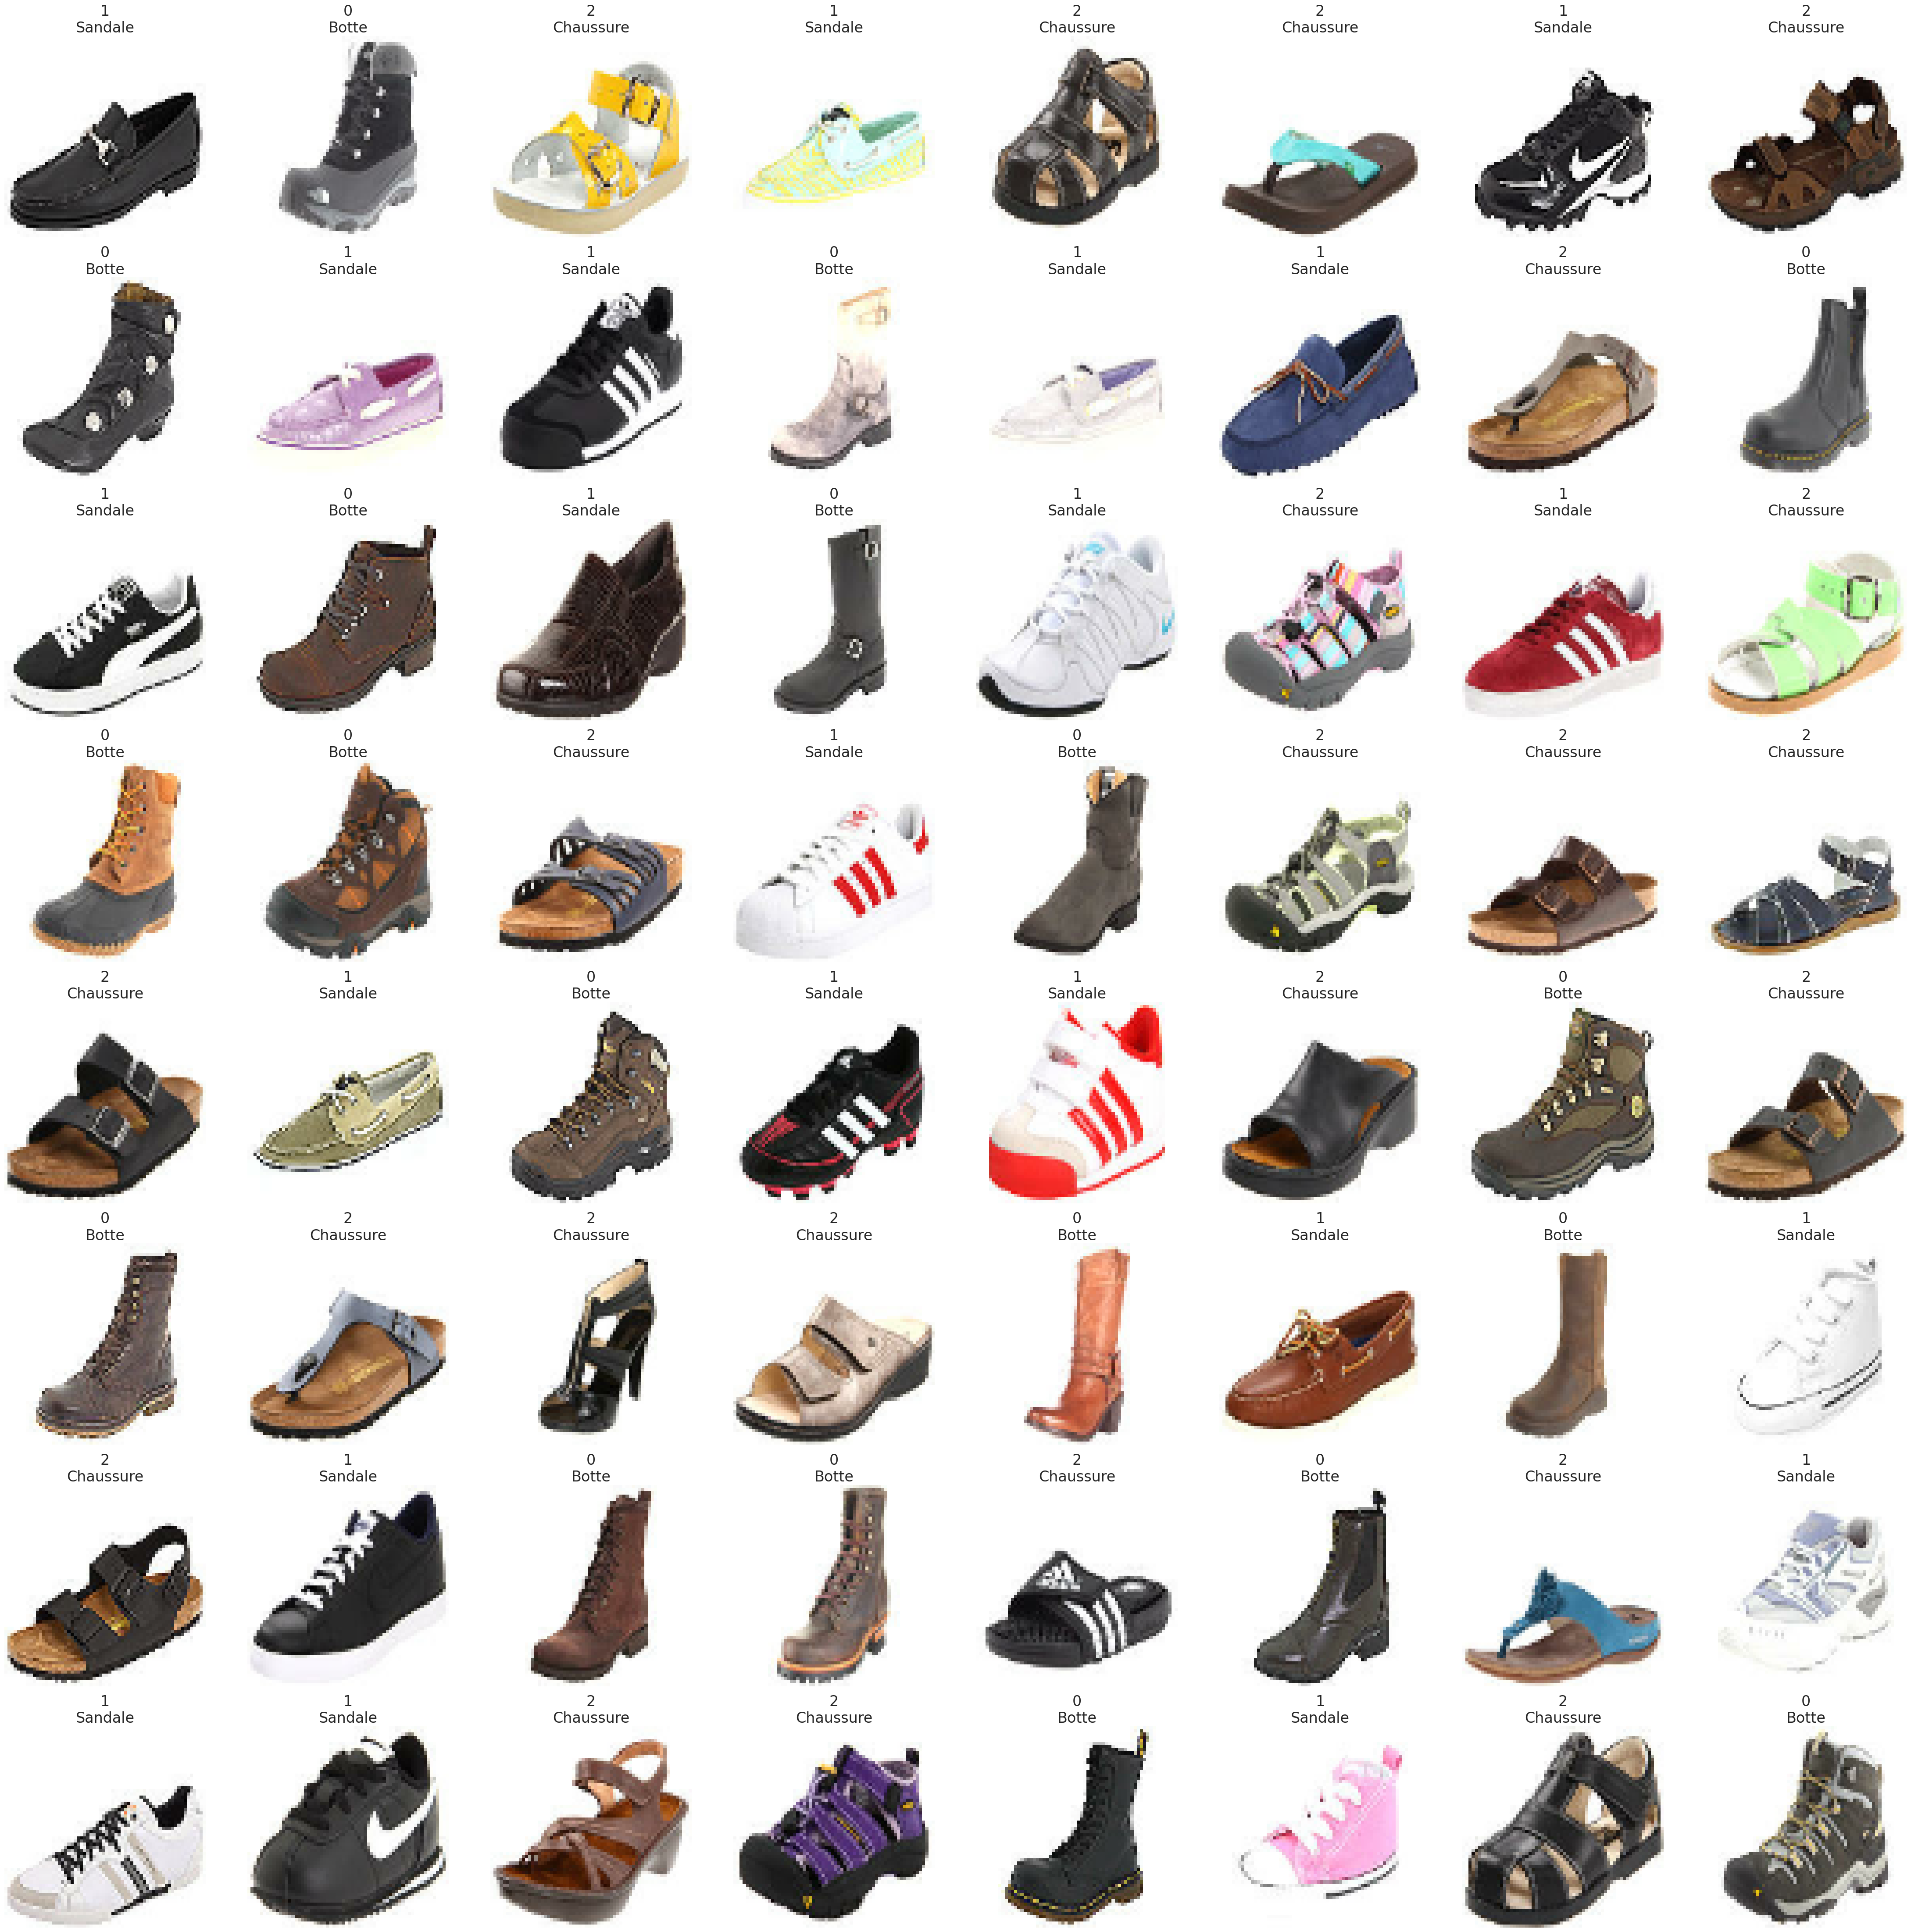

In [14]:
plt.figure(figsize=(56, 56))
for images, labels in validation.take(2):
    for i in range(64):
        ax = plt.subplot(8, 8, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        label = np.argmax(labels[i])
        plt.title(f'{label}\n{dictLabels[label]}')
        plt.axis("off")

## <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:100%; border-radius:10px 10px; box-shadow: 8px 8px 8px #042b4c;text-align: left'>Augmentation de données </div></b>

In [15]:
data_augmentation = tf.keras.Sequential(
    [
        tf.keras.layers.RandomFlip("horizontal"),
        tf.keras.layers.RandomRotation(0.3),
        tf.keras.layers.RandomRotation(0.6),
    ]
)

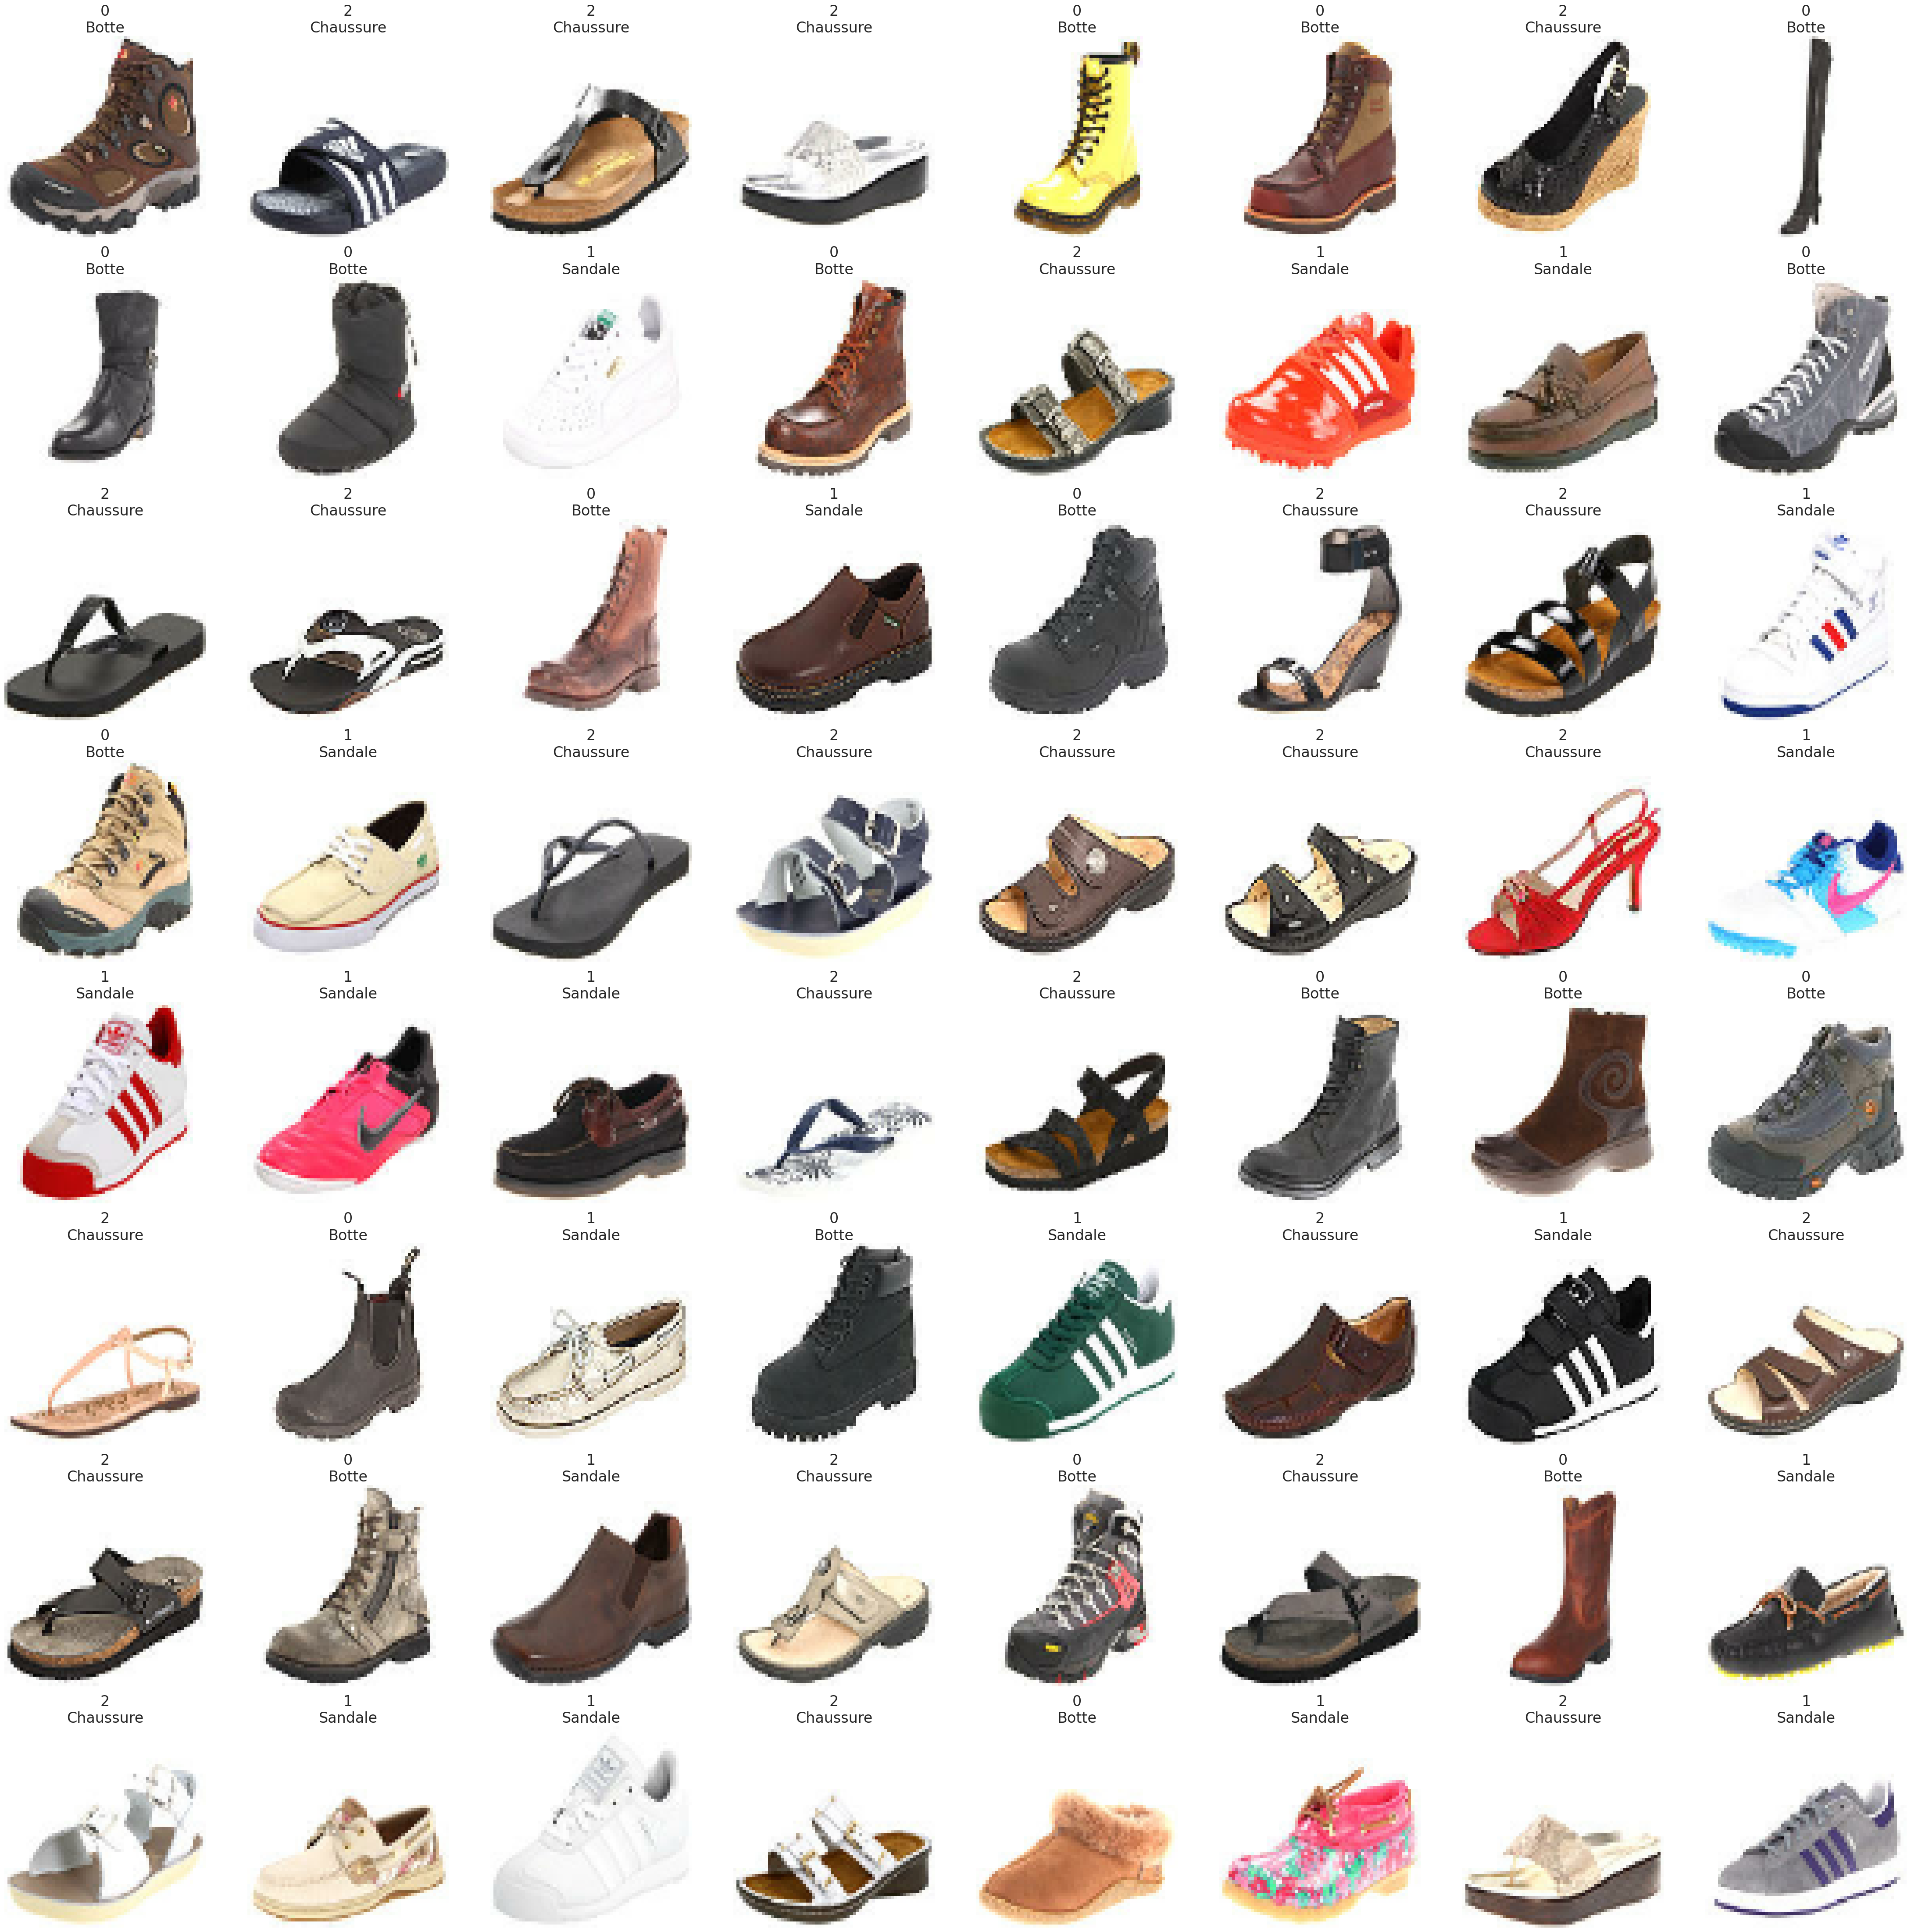

In [16]:
plt.figure(figsize=(56, 56))
for images, labels in donnees.take(2):
    for i in range(64):
        ax = plt.subplot(8, 8, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        label = np.argmax(labels[i])
        plt.title(f'{label}\n{dictLabels[label]}')
        plt.axis("off")

# <b><div style='padding:18px;background-color:#d8dcd6;color:#030aa7;font-size:130%; border-radius:12px 12px; box-shadow: 8px 8px 8px #042b4c;text-align: left'>Création des fichiers TFRecors</div></b>

In [17]:
def _bytes_feature(value):
    if isinstance(value, type(tf.constant(0))): value = value.numpy()  
    return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

def _float_feature(value):
    return tf.train.Feature(float_list=tf.train.FloatList(value=[value]))

def _int64_feature(value):
    return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))

def _formatageEnregistrement(image, label):
    image = tf.image.encode_jpeg(image)
    formatTFRecord = {
                      'image': _bytes_feature(image),
                      'label': _int64_feature(label)
                      }
    return tf.train.Example(features=tf.train.Features(feature=formatTFRecord)).SerializeToString()

In [18]:
repertoire = '/home/razvan/documentation/DeepLearning/donnees/tfRecords'
fichierSharde = tf.io.TFRecordWriter(os.path.join(repertoire,'chaussures-apprentissage.tfrecords'))

for images, labels in donnees:
    for image, label in zip(images, labels):
        fichierSharde.write(_formatageEnregistrement(image.numpy().astype("uint8"), np.argmax(label.numpy())))
        
fichierSharde.close() 
fichierSharde = tf.io.TFRecordWriter(os.path.join(repertoire,'chaussures-validation.tfrecords'))

for images, labels in validation:
    for image, label in zip(images, labels):
        fichierSharde.write(_formatageEnregistrement(image.numpy().astype("uint8"), np.argmax(label.numpy())))
        
fichierSharde.close() 

# <b><div style='padding:18px;background-color:#d8dcd6;color:#030aa7;font-size:130%; border-radius:12px 12px; box-shadow: 8px 8px 8px #042b4c;text-align: left'>Lecture des fichiers TFRecors</div></b>

In [19]:
def _traitementImage(image):
    image = tf.cast(tf.image.decode_jpeg(image, channels=3), tf.int32)
    return image

In [20]:
def _lectureTFRecord(enregistrement):
    formatTFRecord = ({
        'image': tf.io.FixedLenFeature([], tf.string),
        'label':  tf.io.FixedLenFeature([], tf.int64),
    })

    enregistrement = tf.io.parse_single_example(enregistrement, formatTFRecord)
    enregistrement['image'] =  _traitementImage(enregistrement['image'])
    return enregistrement

In [21]:
def _dictToImageLabel(enregistrement):
    # return enregistrement['image'],tf.one_hot(enregistrement['label'], 5)
    return enregistrement['image'],enregistrement['label']

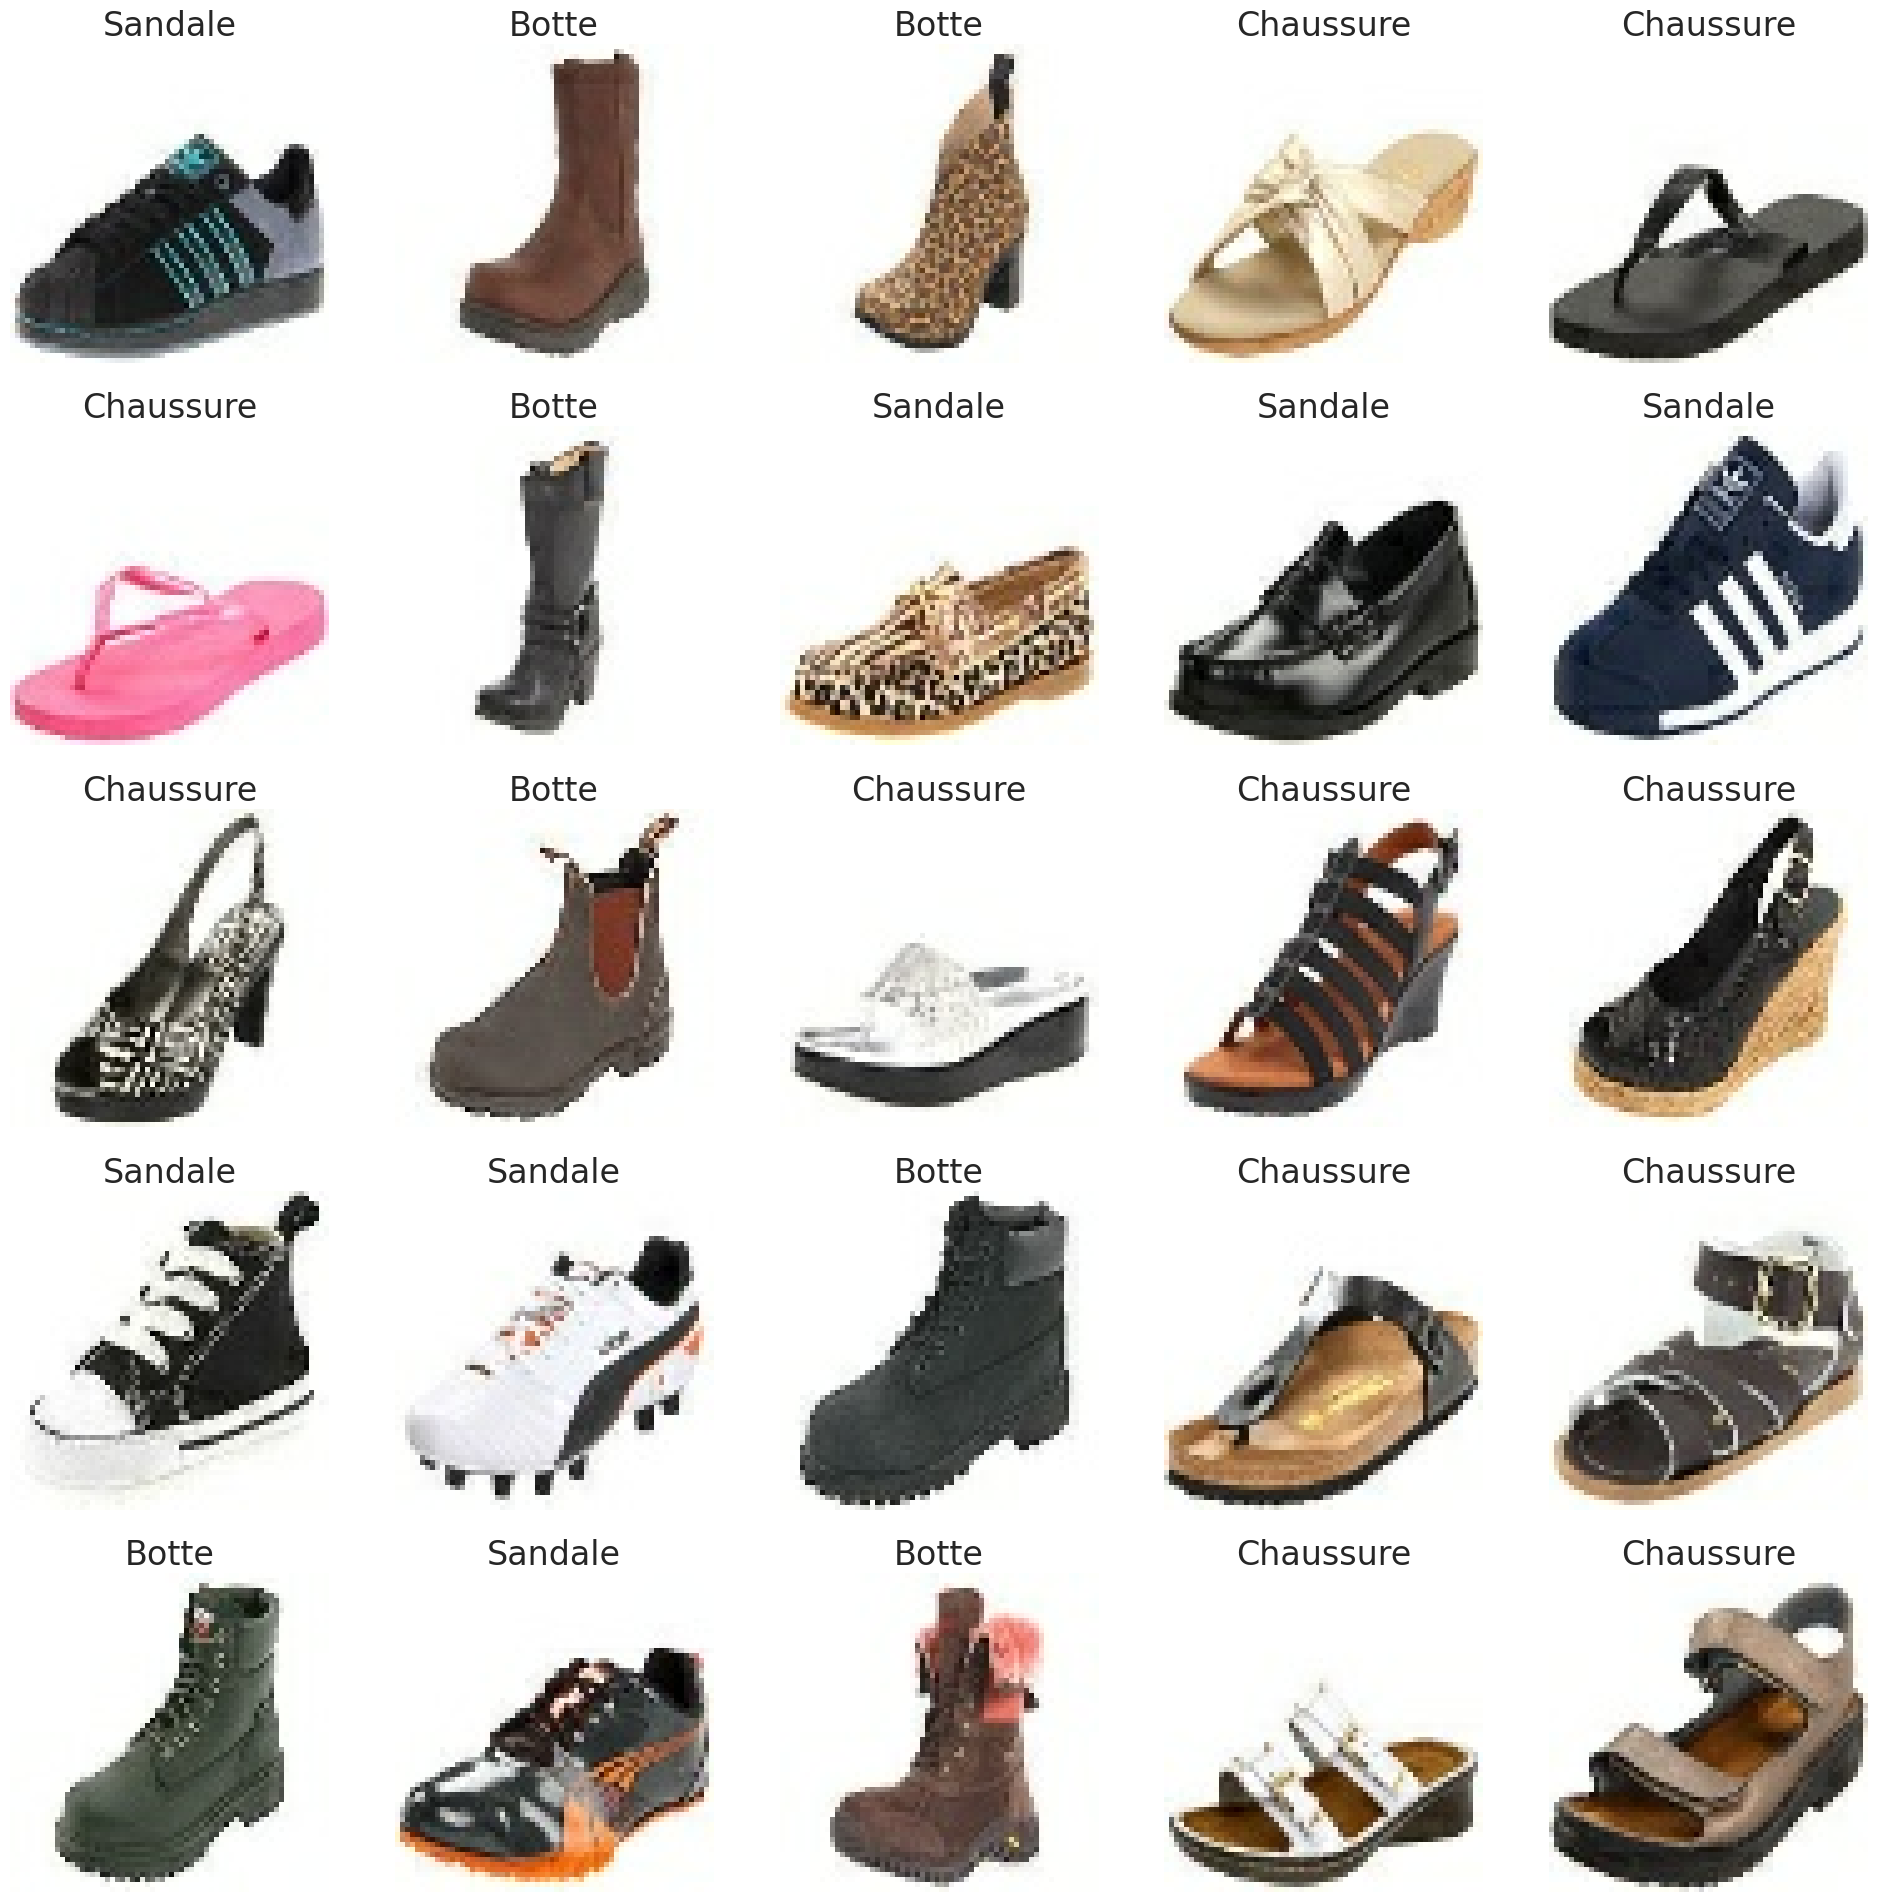

In [22]:
pipeline_train = tf.data.TFRecordDataset(os.path.join(repertoire,'chaussures-apprentissage.tfrecords'))
pipeline_train = pipeline_train.map(_lectureTFRecord)
pipeline_train = pipeline_train.map(_dictToImageLabel)
pipeline_train = pipeline_train.batch(25)
pipeline_train = pipeline_train.prefetch(tf.data.AUTOTUNE)  

image_batch, label_batch = next(iter(pipeline_train))

plt.figure(figsize=(24, 24))
for n in range(25):
    ax = plt.subplot(5, 5, n + 1)
    plt.imshow(image_batch[n])
    # plt.title(dictLabels[tf.math.argmax(label_batch[n]).numpy()])
    plt.title(dictLabels[label_batch[n].numpy()])
    plt.axis("off")

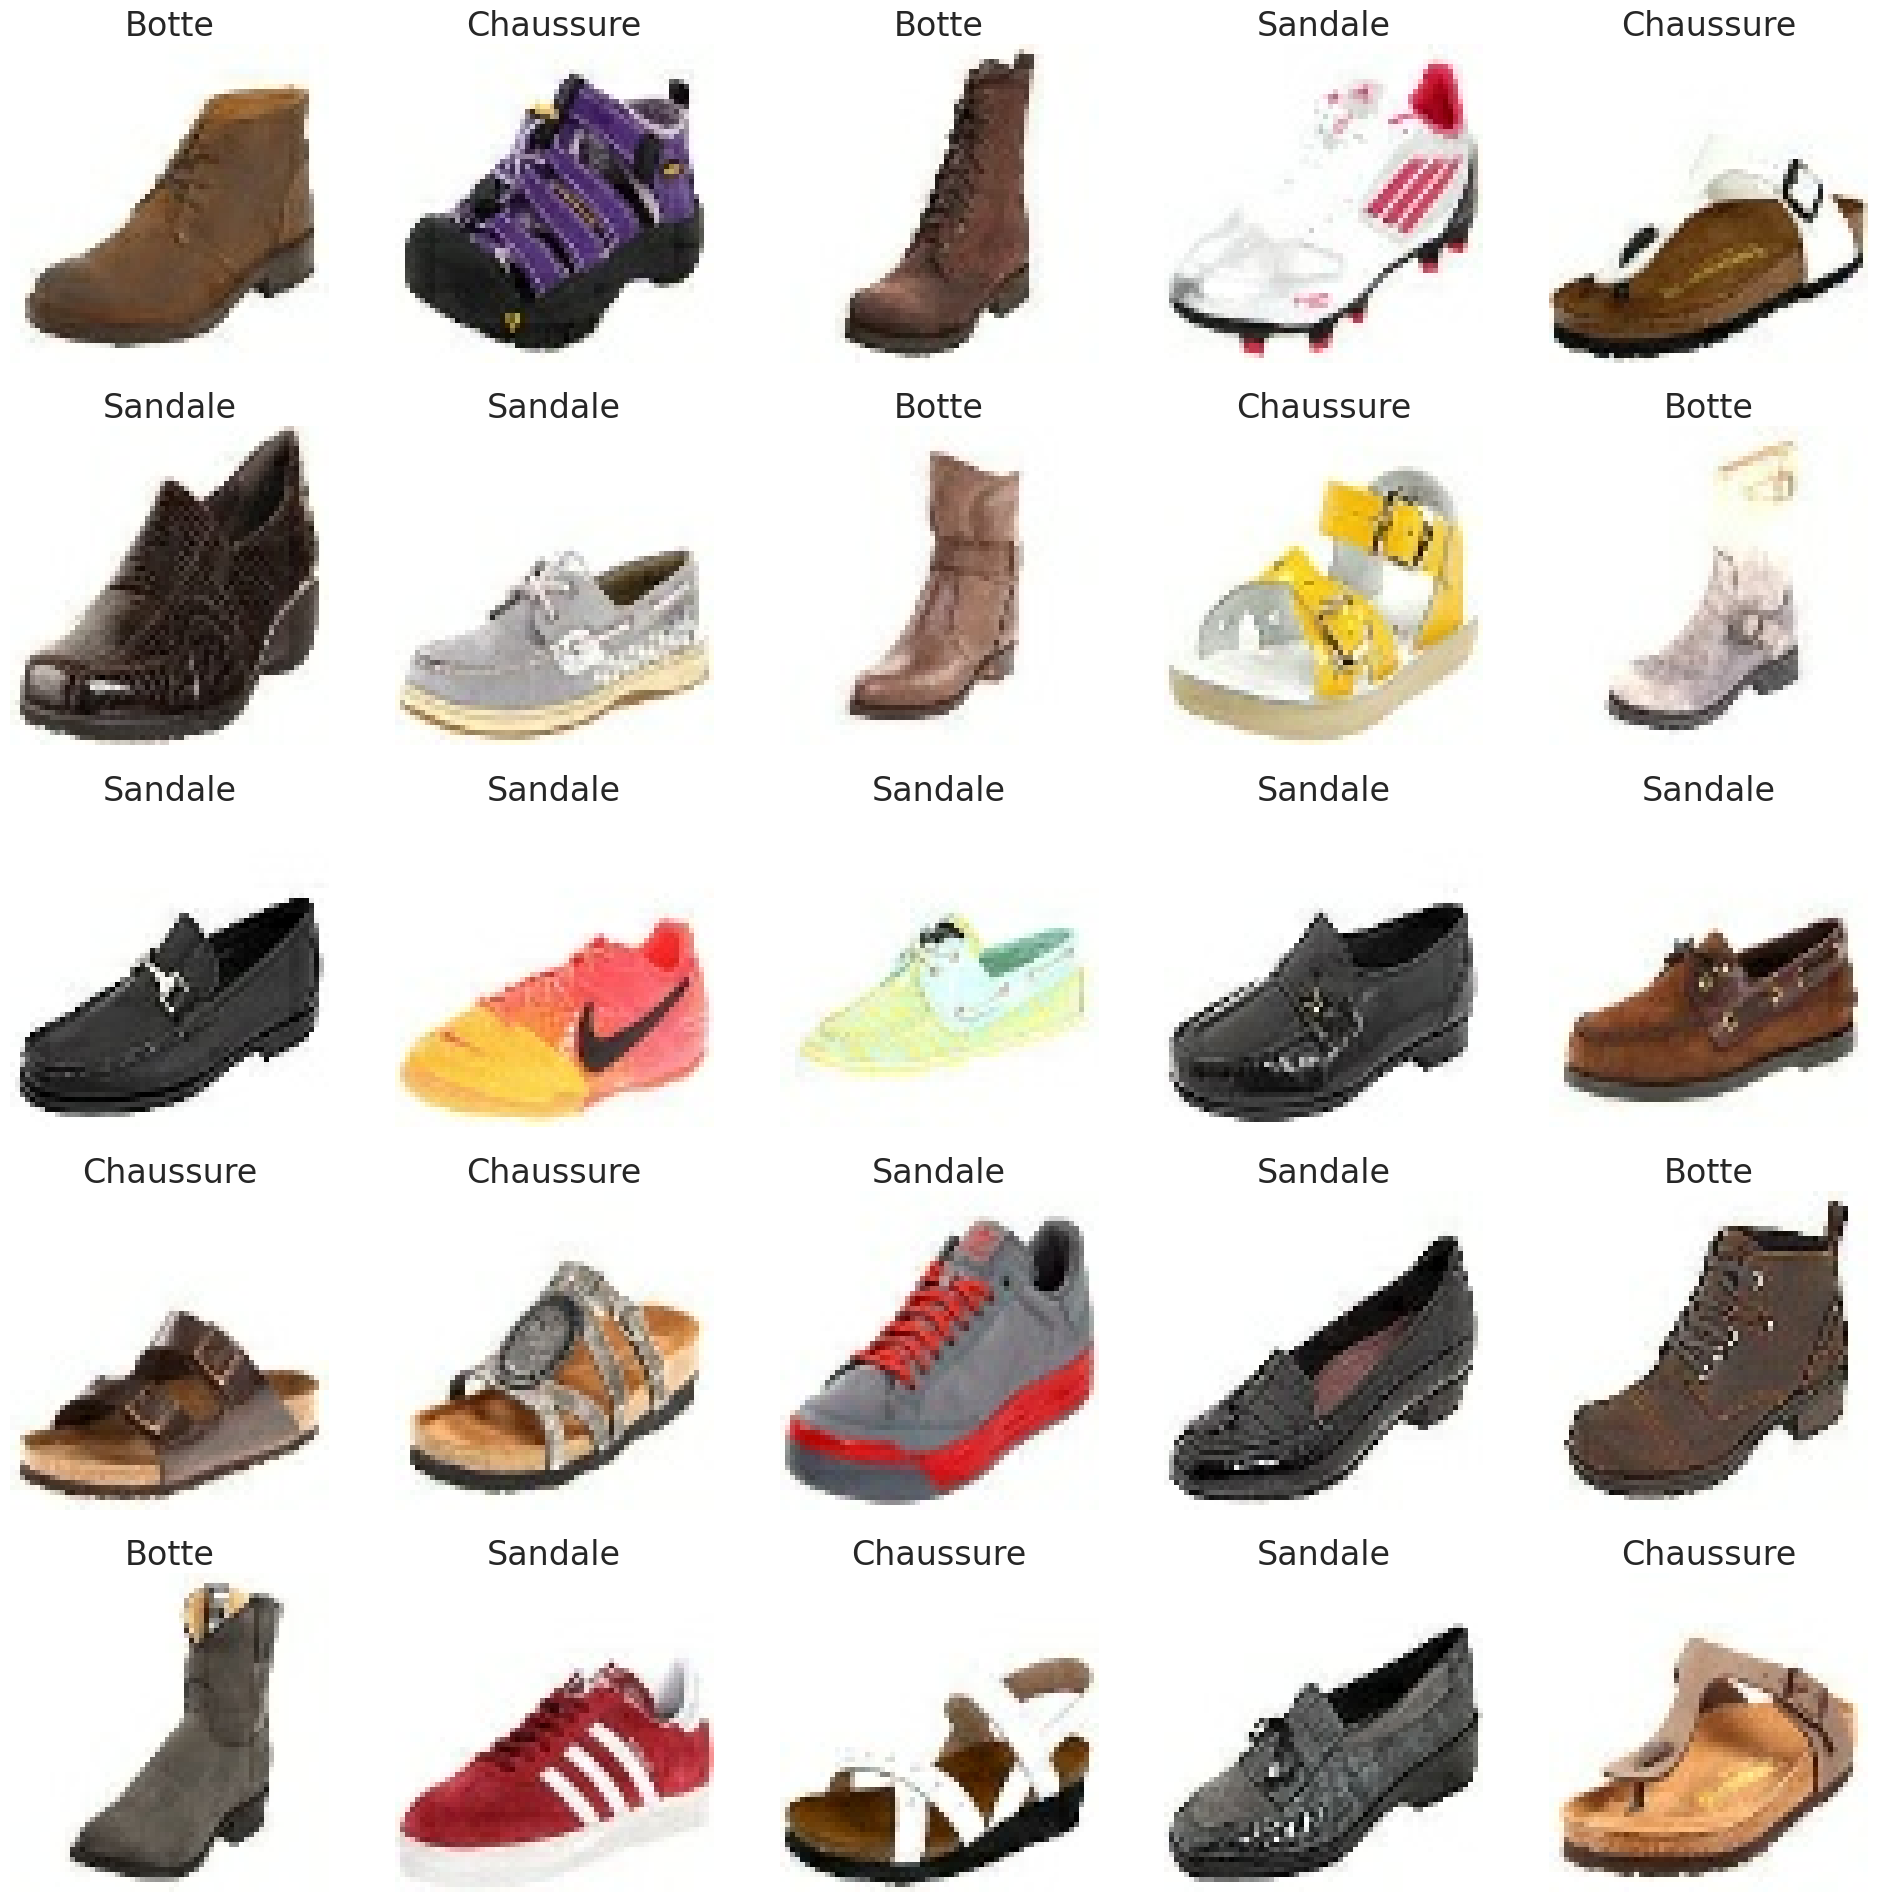

In [23]:
pipeline_train = tf.data.TFRecordDataset(os.path.join(repertoire,'chaussures-validation.tfrecords'))
pipeline_train = pipeline_train.map(_lectureTFRecord)
pipeline_train = pipeline_train.map(_dictToImageLabel)
pipeline_train = pipeline_train.batch(25)
pipeline_train = pipeline_train.prefetch(tf.data.AUTOTUNE)  

image_batch, label_batch = next(iter(pipeline_train))

plt.figure(figsize=(24, 24))
for n in range(25):
    ax = plt.subplot(5, 5, n + 1)
    plt.imshow(image_batch[n])
    # plt.title(dictLabels[tf.math.argmax(label_batch[n]).numpy()])
    plt.title(dictLabels[label_batch[n].numpy()])
    plt.axis("off")

# <b><div style='padding:18px;background-color:#d8dcd6;color:#030aa7;font-size:130%; border-radius:12px 12px; box-shadow: 8px 8px 8px #042b4c;text-align: left'>Initialisation des flux de lecture des fichiers TFRecors</div></b>

In [24]:
batch_size = 8

pipeline_apprentissage = tf.data.TFRecordDataset(os.path.join(repertoire,'chaussures-apprentissage.tfrecords'))
pipeline_apprentissage = pipeline_apprentissage.map(_lectureTFRecord)
pipeline_apprentissage = pipeline_apprentissage.map(_dictToImageLabel)
pipeline_apprentissage = pipeline_apprentissage.batch(batch_size)
pipeline_apprentissage = pipeline_apprentissage.prefetch(tf.data.AUTOTUNE)  

pipeline_validation = tf.data.TFRecordDataset(os.path.join(repertoire,'chaussures-validation.tfrecords'))
pipeline_validation = pipeline_validation.map(_lectureTFRecord)
pipeline_validation = pipeline_validation.map(_dictToImageLabel)
pipeline_validation = pipeline_validation.batch(batch_size)
pipeline_validation = pipeline_validation.prefetch(tf.data.AUTOTUNE)  